#### **習題二: AT&T 分析**
資料包括40個人，總共400張（64x64）照片。


In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Reshape
from keras.optimizers import SGD, Adam
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from keras.layers import  Input,InputLayer
import scipy


檔案讀取後，分成訓練、測試集後，我們將訓練資料轉換成 64x64 的矩陣並命名為 images_train，同時也將其對應的類別標籤命名為 targets_train。對於測試資料，我們以相同的方式進行轉換，將其命名為 images_test 和 targets_test。這樣的資料整理是為了供卷積神經網絡 (CNN) 模型讀取使用。

In [2]:
#face_data
import pandas as pd

# 讀取CSV文件
df = pd.read_csv('C:/vscode/淺度hw3練習/face_data.csv')
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1]) # 標籤欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=9)

images =[]
targets = []
for i in range(X_train.shape[0]):
    image = X_train[i,:].reshape((64,64))
    target = y_train[i]
    images.append(image)
    targets.append(target)
images_train = np.array(images,dtype= "float32")
targets_train = np.array(targets,dtype="int32")
# print(images_train)
# print(targets_train.shape)
images_train,targets_train = shuffle(images_train,targets_train)

images =[]
targets = []
for i in range(X_test.shape[0]):
    image = X_test[i,:].reshape((64,64))
    target = y_test[i]
    images.append(image)
    targets.append(target)
images_test = np.array(images,dtype= "float32")
targets_test= np.array(targets,dtype="int32")
# print(images_test.shape)
# print(targets_test.shape)
images_test,targets_test = shuffle(images_test,targets_test)

1.使用Logistic模型進行學習、預測，最後列印出準確率回報。

In [3]:
#Logist

opts = dict(tol = 0.001, max_iter = int(1e6), verbose=1) 
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts) 
clf_original.fit(X_train, y_train)
y_pred = clf_original.predict(X_test)
# 測試資料之準確率回報 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         4
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       0.50    

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

#### **討論**
此資料在使用Logistic模型學習後，預測率有94%，大部分recall、f1-score皆有良好的表現，但其中預測類別17、39預測率只有50%。

2.使用SNM模型進行學習、預測，最後列印出準確率回報。

In [4]:
#SVM

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 0.001, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         4
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         1
          18       1.00    

#### **討論**
此資料在使用Logistic模型學習後，預測率有96%，大部分recall、f1-score皆有良好的表現，其中預測類別為23的預測率只有50%。

In [5]:
#MLP


# hidden_layers = (512,) # one hidden layer
# activation = ’relu’ # the default
hidden_layers = (64,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = True,activation = activation, tol = 0.001, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)
print(classification_report(y_test, predictions))


Iteration 1, loss = 3.73873110
Iteration 2, loss = 3.68655816
Iteration 3, loss = 3.67172254
Iteration 4, loss = 3.65276619
Iteration 5, loss = 3.62623448
Iteration 6, loss = 3.60831199
Iteration 7, loss = 3.58848313
Iteration 8, loss = 3.56648564
Iteration 9, loss = 3.54494715
Iteration 10, loss = 3.52908902
Iteration 11, loss = 3.51014943
Iteration 12, loss = 3.49446720
Iteration 13, loss = 3.46823106
Iteration 14, loss = 3.45144436
Iteration 15, loss = 3.43512743
Iteration 16, loss = 3.41224954
Iteration 17, loss = 3.39528129
Iteration 18, loss = 3.38014011
Iteration 19, loss = 3.35232112
Iteration 20, loss = 3.33853144
Iteration 21, loss = 3.31910877
Iteration 22, loss = 3.29614814
Iteration 23, loss = 3.27860145
Iteration 24, loss = 3.26245924
Iteration 25, loss = 3.23313888
Iteration 26, loss = 3.21520828
Iteration 27, loss = 3.19593172
Iteration 28, loss = 3.17360721
Iteration 29, loss = 3.15357941
Iteration 30, loss = 3.12689383
Iteration 31, loss = 3.10531784
Iteration 32, los

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

#### **討論**
此資料在使用MLP模型，迭代變化率限制在0.001下，總共迭代了403次，損失下降至0.1，預測率為93%，其中預測類別為39、17的預測率只有50%，23準確率為67%左右，其餘的recall、f1-score有皆有良好的表現。

4.CNN  

先建立了一個序列模型（Sequential model），該模型包含了卷積層、池化層、Dropout 層、展平層和全連接層。這個模型的輸入形狀為(64,64,1)，表示輸入圖像的大小為 64x64，並且是單通道的（灰度圖像）。

模型的結構如下：
1. Conv2D 層：具有 128 個 3x3 的卷積核，使用 ReLU 激活函數，並使用步幅為 2 進行卷積操作。padding 設置為 "same"，以保持輸入與輸出的大小相同。
2. MaxPooling2D 層：使用 2x2 的池化窗口進行最大池化操作，並且步幅也為 2。
3. Conv2D 層：具有 64 個 3x3 的卷積核，使用 ReLU 激活函數，並使用步幅為 2 進行卷積操作。padding 設置為 "same"。
4. Dropout 層：丟棄率為 0.2，以減少過度擬合。
5. Flatten 層：將多維輸入展平成一維輸出。
6. 最後一層為輸出（Dense）層：因總共有40個類別所以設定有 40 個神經元，使用 sigmoid 激活函數。

模型的編譯使用了 adam 優化器，損失函數為稀疏分類交叉熵（sparse categorical crossentropy），度量指標為準確率（accuracy）。然後，通過訓練集 images_train 和 targets_train 進行了 35 次 epoch 的訓練。


In [5]:
#cnn
from keras.layers import  Input
input_shape= (64,64,1)

model = Sequential([
    # Input(shape=input_shape),
    Conv2D(128,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    MaxPooling2D((2,2),strides=2),
    Conv2D(64,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(40, activation='sigmoid')
    ])

model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(images_train,targets_train,epochs=30)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0230 - loss: 3.7153  
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0488 - loss: 3.6826 
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0385 - loss: 3.6719 
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0287 - loss: 3.6481     
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0454 - loss: 3.6224 
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0997 - loss: 3.5352 
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2611 - loss: 3.3230 
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3955 - loss: 2.9266 
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5140 - loss: 2.4405 
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 1.7063 
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7805 - loss: 1.0759 
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8384 - loss: 0.76

In [7]:
predictions =model.predict(images_test)
targets_pred = np.argmax(predictions,axis=1)

print(classification_report(targets_test, targets_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      0.75      0.86         4
           3       1.00      0.80      0.89         5
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         4
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

#### **討論**
此資料在使用CNN模型進行30次迭代學習後，預測率為95%，其中預測類別為4、9、12的recall只有67%，其餘的recall、f1-score有皆有良好的表現。   
這裡可能會有一個疑問，即在不同的epochs下，分類器的性能變化如何？是否30個epochs是最佳的表現選擇？  
接下來，我們分別畫出訓練和測試集的epochs 1到100其對應的loss、accuracy的折線圖來觀察。

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0101 - loss: 3.7167 - val_accuracy: 0.0167 - val_loss: 3.6883
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0559 - loss: 3.6825 - val_accuracy: 0.0083 - val_loss: 3.6922
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0343 - loss: 3.6746 - val_accuracy: 0.0083 - val_loss: 3.6992
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0298 - loss: 3.6516 - val_accuracy: 0.0083 - val_loss: 3.7117
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0258 - loss: 3.6165 - val_accuracy: 0.0083 - val_loss: 3.6768
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0920 - loss: 3.5442 - val_accuracy: 0.0417 - val_loss: 3.5988
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1939 - loss: 3.3944 - val_accuracy: 0.1833 - val_loss: 3.3054
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3066 - loss: 3.0387 - val_accuracy: 0.5083 - val_loss: 2.8044

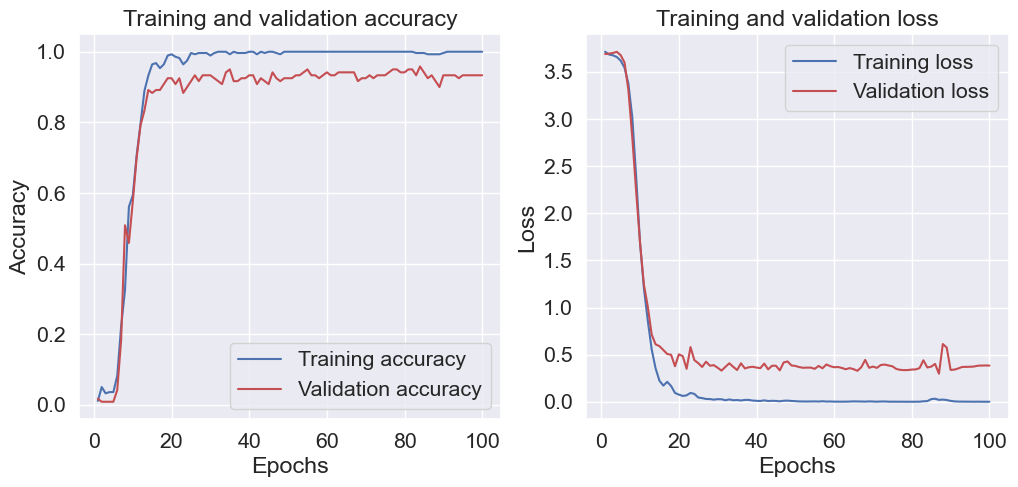

In [4]:

history = model.fit(images_train, targets_train, epochs=100, validation_data=(images_test,targets_test))


train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### **討論**
由上圖知此資料在epochs為20後，測試集合訓練集的accuracy和loss是趨於穩定的，故選epochs=30是可以的。

#### **使用PCA分析**
以下代碼找出了大約前15個主成份，這些主成份總共佔了變異量的70%。

In [9]:
pca = PCA().fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio.cumsum()/explained_variance_ratio.sum()*100)

[ 24.84279239  38.90435648  46.99309502  51.96700952  55.46486455
  58.57448167  60.95945244  62.99588279  64.95228447  66.64333439
  68.22943363  69.62613722  70.87799841  72.08702951  73.15055737
  74.14175577  75.03044619  75.81824738  76.58119667  77.30964874
  77.99739272  78.62245875  79.21845733  79.8003523   80.37249066
  80.91698116  81.43956956  81.95935996  82.4052769   82.84321709
  83.25259462  83.63845137  84.00569307  84.35901054  84.69577952
  85.0167109   85.32498717  85.6277421   85.92097799  86.20688949
  86.47650673  86.73721535  86.99407575  87.22979576  87.46421257
  87.69543196  87.9200119   88.13651425  88.34763614  88.55478106
  88.75419408  88.95170173  89.14264893  89.33146862  89.5153195
  89.69364744  89.86541877  90.03569362  90.2024994   90.36599731
  90.52784847  90.68596101  90.8415545   90.99309691  91.13849452
  91.28290292  91.42566432  91.56373561  91.69918121  91.83256501
  91.96046767  92.08711058  92.21221371  92.3332992   92.45172056
  92.568736

5.接著使用Logistic進行學習後，列印出準確率回報。

In [3]:
#PCA_Logist

pca = PCA(n_components = 15).fit(X_train)

Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
opts = dict(tol = 0.001, max_iter = int(1e6), verbose=1)
solver ='lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      0.40      0.57         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.60      1.00      0.75         3
           8       0.75      0.75      0.75         4
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00    

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

#### **討論**
此資料在使用Logistic模型學習後，預測率為91%，其中預測類別為12、39的預測率只有50%，recall、f1-score也較低，其餘的準確率、recall、f1-score有皆有良好的表現。

6.使用SVM進行學習後，列印出準確率回報。

In [11]:
#SVM_PCA

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 0.001, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         4
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.75      1.00      0.86         3
           8       0.60      0.75      0.67         4
           9       1.00      0.40      0.57         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         1
          18       1.00    

#### **討論**
此資料在使用Logistic模型學習後，預測率為90%，其中預測類別為24、39的預測率只有50%，8、23、28準確率在60%~70%，其餘的準確率、recall、f1-score有皆有良好的表現。

7.使用MLP進行學習後，列印出準確率回報。

In [12]:
#MLP_PCA

# hidden_layers = (512,) # one hidden layer
# activation = ’relu’ # the default
hidden_layers = (64,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = True,activation = activation, tol = 0.001, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)
print(classification_report(y_test, predictions))

Iteration 1, loss = 3.74506514
Iteration 2, loss = 3.71818492
Iteration 3, loss = 3.69622903
Iteration 4, loss = 3.67559341
Iteration 5, loss = 3.65547889
Iteration 6, loss = 3.63652972
Iteration 7, loss = 3.61894286
Iteration 8, loss = 3.60272378
Iteration 9, loss = 3.58700779
Iteration 10, loss = 3.57140761
Iteration 11, loss = 3.55694750
Iteration 12, loss = 3.54252841
Iteration 13, loss = 3.52831580
Iteration 14, loss = 3.51475882
Iteration 15, loss = 3.50151188
Iteration 16, loss = 3.48849349
Iteration 17, loss = 3.47528704
Iteration 18, loss = 3.46203457
Iteration 19, loss = 3.44956686
Iteration 20, loss = 3.43622316
Iteration 21, loss = 3.42316834
Iteration 22, loss = 3.40973377
Iteration 23, loss = 3.39655341
Iteration 24, loss = 3.38323448
Iteration 25, loss = 3.36969432
Iteration 26, loss = 3.35633016
Iteration 27, loss = 3.34317811
Iteration 28, loss = 3.32953676
Iteration 29, loss = 3.31590575
Iteration 30, loss = 3.30222863
Iteration 31, loss = 3.28841610
Iteration 32, los

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

#### **討論**
此資料在使用MLP模型，迭代變化率限制在0.001下，總共迭代了462次，損失下降至0.2，預測率為88%，其中預測類別為23、39的預測率只有50%，類別15雖然準確率有100%但recall、f1-score為33％、50％，其餘的recall、f1-score有皆有良好的表現。

8.使用CNN後進行學習後，列印出準確率回報。

In [6]:
#CNN_pca
from keras.layers import  Input
input_shape= (15,)

model = Sequential([
    Input(shape=input_shape),
    Reshape(target_shape=(5,3,1)),
    Conv2D(128,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    MaxPooling2D((2,2),strides=2),
    Conv2D(64,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(40, activation='sigmoid')
    ])

model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(Z_train,y_train,epochs=200)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0217 - loss: 3.6841      
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1083 - loss: 3.6368 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1168 - loss: 3.5732 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1465 - loss: 3.5033 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1025 - loss: 3.4514 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1466 - loss: 3.3473 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1840 - loss: 3.1741 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2002 - loss: 3.1321 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2556 - loss: 2.9794 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3246 - loss: 2.8299 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3223 - loss: 2.7889 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3158 

列印出準確率回報

In [7]:
predictions =model.predict(Z_test)
targets_pred = np.argmax(predictions,axis=1)

print(classification_report(y_test, targets_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       0.75      0.75      0.75         4
           7       0.50      1.00      0.67         3
           8       0.60      0.75      0.67         4
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.25      0.33      0.29         3
          13       1.00      1.00      1.00         3
          15       0.33      0.33      0.33         3
          16       0.80      1.00      0.89         4
          17       1.00      1.00      1.00

#### **討論**
在迭代次數為200下，此CNN模型準確率只有77％，其中預測類別2、3、7、12、15、25、39準確率皆低於50%，有些許類別預測都只有67%左右，此模型較差的原因有可能是在主成份分析後，在重組為3x5的矩陣已經把原有特徵模糊化了，又或者建立的模型或者參數設定不適合此資料...等。  
接下來，我們分別畫出訓練和測試集的epochs 1到250其對應的loss、accuracy的折線圖來觀察。

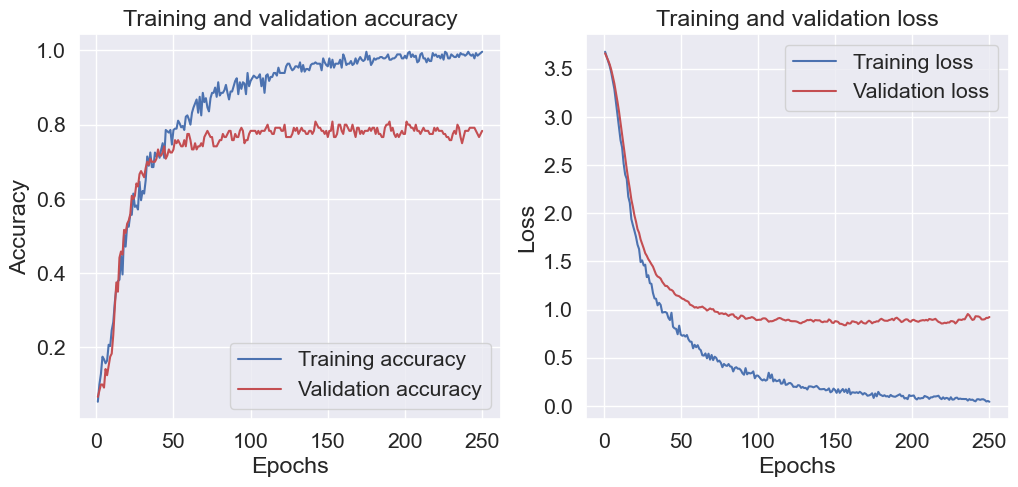

In [5]:

history = model.fit(Z_train, y_train, epochs=250, validation_data=(Z_test,y_test),verbose=0)


train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### **討論**
可以發現隨著epochs超過大約30，測試集和訓練集的acc和loss差距變大，這可能代表過度擬合了，但到epochs在50後差距並沒有擴大，故可以選擇epochs為250內，或者重新調整模型。
 

#### **結論**
|  | Logistic | SVM |MLP|  CNN|
|----------|:---------:|---------:|---------:|---------:
|    accuracy |   0.94  |    0.96|0.93|0.95|
|  accuracy(前13個主成分)   |   0.91  |    0.90|0.88|  0.77

此資料使用在SVM分類器下精確度最高為0.96，主成分分析後的資料，Logistic、SVM、MLP表現差不多，但CNN其準確率只有0.77，結論為此資料在SVM下的表現下較佳，且主成分分析後資料不建議使用CNN來分類。